In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load the File and Relevant Sheets

In [23]:
# Load Excel file
xls = pd.ExcelFile("occupation-visas-datasets-mar-2025.xlsx")

# Load application data with the correct header row
app_df = pd.read_excel(xls, sheet_name="Data_Occ_D01", header=3)
# Load Grants data with the correct header row
grant_df = pd.read_excel(xls, sheet_name="Data_Occ_D02", header=3)

app_df.head()


,Year,Quarter,Nationality,Region,Visa type,Visa type subgroup,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group,Applications
0,2021,2021 Q1,*,*,Worker,Health and Care Worker,Accommodation and Food Service Activities,2 - Professional Occupations,22 - Health Professionals,223 - Nursing Professionals,*,27
1,2021,2021 Q1,*,*,Worker,Health and Care Worker,Administrative and Support Service Activities,2 - Professional Occupations,22 - Health Professionals,223 - Nursing Professionals,*,8
2,2021,2021 Q1,*,*,Worker,Health and Care Worker,Education,3 - Associate Professional Occupations,"31 - Science, Engineering and Technology Assoc...","311 - Science, Engineering and Production Tech...",*,1
3,2021,2021 Q1,*,*,Worker,Health and Care Worker,Education,2 - Professional Occupations,22 - Health Professionals,222 - Therapy Professionals,*,4
4,2021,2021 Q1,*,*,Worker,Health and Care Worker,Education,2 - Professional Occupations,"21 - Science, Research, Engineering and Techno...",211 - Natural and Social Science Professionals,*,1


In [25]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34142 entries, 0 to 34141
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  34142 non-null  int64 
 1   Quarter               34142 non-null  object
 2   Nationality           34142 non-null  object
 3   Region                34142 non-null  object
 4   Visa type             34142 non-null  object
 5   Visa type subgroup    34142 non-null  object
 6   Industry              34142 non-null  object
 7   Occ. major group      34142 non-null  object
 8   Occ. sub-major group  34142 non-null  object
 9   Occ. minor group      34142 non-null  object
 10  Occ. unit group       34142 non-null  object
 11  Applications          34142 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 3.1+ MB


In [27]:
app_df.isnull().sum()

Year                    0
Quarter                 0
Nationality             0
Region                  0
Visa type               0
Visa type subgroup      0
Industry                0
Occ. major group        0
Occ. sub-major group    0
Occ. minor group        0
Occ. unit group         0
Applications            0
dtype: int64

In [29]:
app_df.dtypes

Year                     int64
Quarter                 object
Nationality             object
Region                  object
Visa type               object
Visa type subgroup      object
Industry                object
Occ. major group        object
Occ. sub-major group    object
Occ. minor group        object
Occ. unit group         object
Applications             int64
dtype: object

In [39]:
# remove empty columns
app_df.drop(columns=['Nationality','Region','Occ. unit group'], inplace=True)

In [40]:
app_df.head()

,Year,Quarter,Visa type,Visa type subgroup,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Applications
0,2021,2021 Q1,Worker,Health and Care Worker,Accommodation and Food Service Activities,2 - Professional Occupations,22 - Health Professionals,223 - Nursing Professionals,27
1,2021,2021 Q1,Worker,Health and Care Worker,Administrative and Support Service Activities,2 - Professional Occupations,22 - Health Professionals,223 - Nursing Professionals,8
2,2021,2021 Q1,Worker,Health and Care Worker,Education,3 - Associate Professional Occupations,"31 - Science, Engineering and Technology Assoc...","311 - Science, Engineering and Production Tech...",1
3,2021,2021 Q1,Worker,Health and Care Worker,Education,2 - Professional Occupations,22 - Health Professionals,222 - Therapy Professionals,4
4,2021,2021 Q1,Worker,Health and Care Worker,Education,2 - Professional Occupations,"21 - Science, Research, Engineering and Techno...",211 - Natural and Social Science Professionals,1


<Axes: title={'center': 'Total Visa Applications per Year'}, xlabel='Year'>

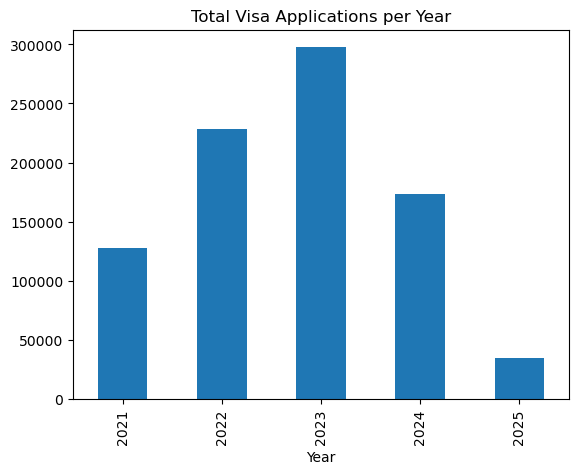

In [61]:
# Total applications per year
app_df.groupby("Year")["Applications"].sum().plot(kind="bar", title="Total Visa Applications per Year")


##### NOTES:**We can see that the most number of application was in 2023**

In [43]:
app_df.groupby('Visa type')['Applications'].sum()

Visa type
Temporary Worker    229423
Worker              632587
Name: Applications, dtype: int64

<Axes: title={'center': 'Total Applications per Industry'}, ylabel='Industry'>

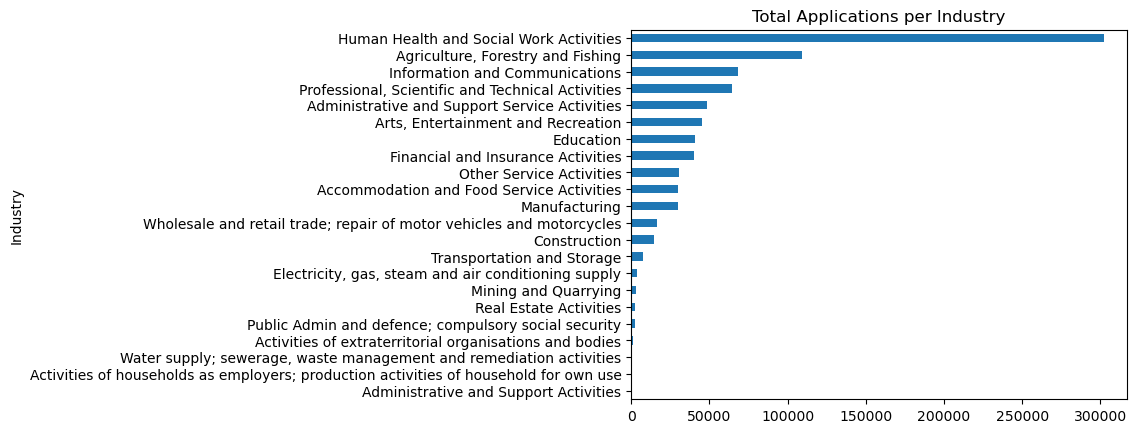

In [45]:
app_df.groupby('Industry')['Applications'].sum().sort_values().plot(kind='barh', title='Total Applications per Industry')

##### NOTES:We can see most number of application was for Human health and social work activities

In [62]:
quarterly_apps = app_df.groupby('Quarter')['Applications'].sum().reset_index()
quarterly_apps.head(50)

,Quarter,Applications
0,2021 Q1,19552
1,2021 Q2,31773
2,2021 Q3,37376
3,2021 Q4,39520
4,2022 Q1,46044
5,2022 Q2,67288
6,2022 Q3,59841
7,2022 Q4,55305
8,2023 Q1,72038
9,2023 Q2,85447


Text(0.5, 1.0, 'Visa Applications Over Time')

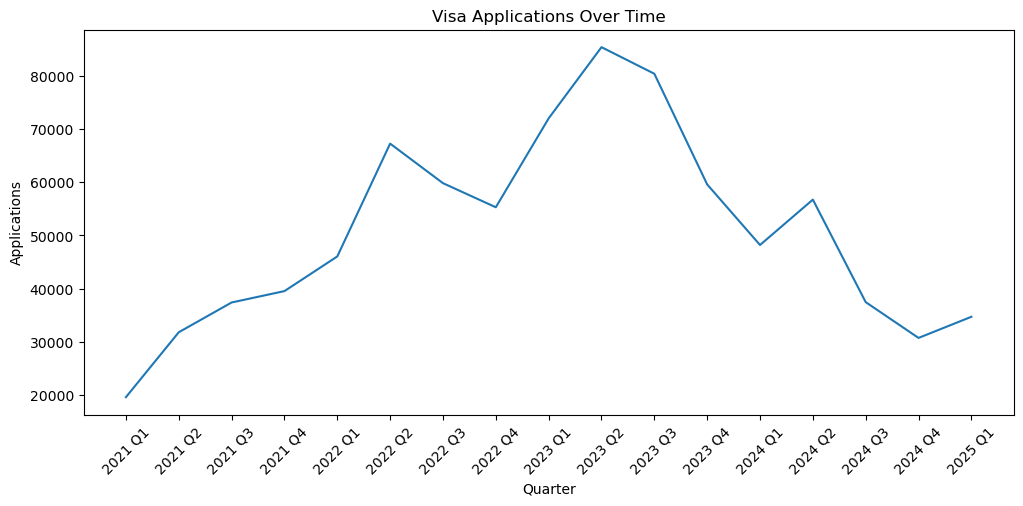

In [59]:
# Applications over time (year + quarter)
quarterly_apps = app_df.groupby('Quarter')['Applications'].sum().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(data=quarterly_apps, x="Quarter", y="Applications")
plt.xticks(rotation=45)
plt.title("Visa Applications Over Time")


###### Illustrate the trend of visa application

In [24]:
grant_df.head()

,Year,Quarter,Nationality,Region,Visa type,Visa type subgroup,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group,Grants
0,2021,2021 Q1,*,*,Worker,Health and Care Worker,Accommodation and Food Service Activities,2 - Professional Occupations,22 - Health Professionals,223 - Nursing Professionals,*,22
1,2021,2021 Q1,*,*,Worker,Health and Care Worker,Administrative and Support Service Activities,2 - Professional Occupations,22 - Health Professionals,223 - Nursing Professionals,*,8
2,2021,2021 Q1,*,*,Worker,Health and Care Worker,Education,3 - Associate Professional Occupations,"31 - Science, Engineering and Technology Assoc...","311 - Science, Engineering and Production Tech...",*,1
3,2021,2021 Q1,*,*,Worker,Health and Care Worker,Education,2 - Professional Occupations,22 - Health Professionals,222 - Therapy Professionals,*,2
4,2021,2021 Q1,*,*,Worker,Health and Care Worker,Education,2 - Professional Occupations,"21 - Science, Research, Engineering and Techno...",211 - Natural and Social Science Professionals,*,1


In [63]:
grant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31191 entries, 0 to 31190
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  31191 non-null  int64 
 1   Quarter               31191 non-null  object
 2   Nationality           31191 non-null  object
 3   Region                31191 non-null  object
 4   Visa type             31191 non-null  object
 5   Visa type subgroup    31191 non-null  object
 6   Industry              31191 non-null  object
 7   Occ. major group      31191 non-null  object
 8   Occ. sub-major group  31191 non-null  object
 9   Occ. minor group      31191 non-null  object
 10  Occ. unit group       31191 non-null  object
 11  Grants                31191 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 2.9+ MB


In [64]:
grant_df.dtypes


Year                     int64
Quarter                 object
Nationality             object
Region                  object
Visa type               object
Visa type subgroup      object
Industry                object
Occ. major group        object
Occ. sub-major group    object
Occ. minor group        object
Occ. unit group         object
Grants                   int64
dtype: object

In [65]:
grant_df.drop(columns=['Nationality','Region','Occ. unit group'], inplace = True)

In [66]:
grant_df.head()

,Year,Quarter,Visa type,Visa type subgroup,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Grants
0,2021,2021 Q1,Worker,Health and Care Worker,Accommodation and Food Service Activities,2 - Professional Occupations,22 - Health Professionals,223 - Nursing Professionals,22
1,2021,2021 Q1,Worker,Health and Care Worker,Administrative and Support Service Activities,2 - Professional Occupations,22 - Health Professionals,223 - Nursing Professionals,8
2,2021,2021 Q1,Worker,Health and Care Worker,Education,3 - Associate Professional Occupations,"31 - Science, Engineering and Technology Assoc...","311 - Science, Engineering and Production Tech...",1
3,2021,2021 Q1,Worker,Health and Care Worker,Education,2 - Professional Occupations,22 - Health Professionals,222 - Therapy Professionals,2
4,2021,2021 Q1,Worker,Health and Care Worker,Education,2 - Professional Occupations,"21 - Science, Research, Engineering and Techno...",211 - Natural and Social Science Professionals,1


<Axes: title={'center': 'Total grants per year'}, xlabel='Year'>

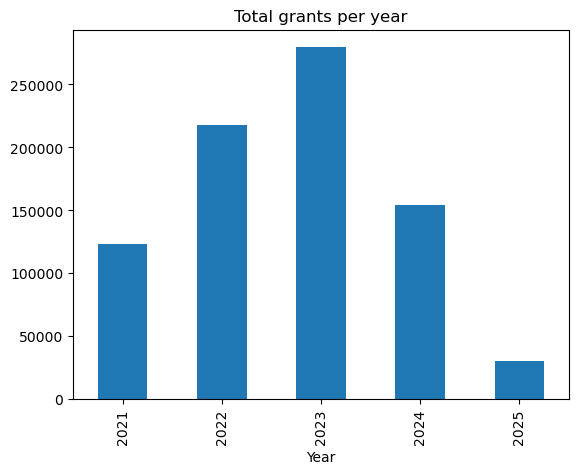

In [67]:
grant_df.groupby('Year')['Grants'].sum().plot(kind='bar',title='Total grants per year')

In [70]:
merged = pd.merge(app_df, grant_df, on=["Year", "Quarter", "Industry", "Occ. major group", "Occ. sub-major group"], how="inner")


In [71]:
merged.head()

,Year,Quarter,Visa type_x,Visa type subgroup_x,Industry,Occ. major group,Occ. sub-major group,Occ. minor group_x,Applications,Visa type_y,Visa type subgroup_y,Occ. minor group_y,Grants
0,2021,2021 Q1,Worker,Health and Care Worker,Accommodation and Food Service Activities,2 - Professional Occupations,22 - Health Professionals,223 - Nursing Professionals,27,Worker,Health and Care Worker,223 - Nursing Professionals,22
1,2021,2021 Q1,Worker,Health and Care Worker,Administrative and Support Service Activities,2 - Professional Occupations,22 - Health Professionals,223 - Nursing Professionals,8,Worker,Health and Care Worker,223 - Nursing Professionals,8
2,2021,2021 Q1,Worker,Health and Care Worker,Administrative and Support Service Activities,2 - Professional Occupations,22 - Health Professionals,223 - Nursing Professionals,8,Temporary Worker,Government Authorised Exchange (previously Tie...,225 - Other Health Professionals,4
3,2021,2021 Q1,Worker,Health and Care Worker,Administrative and Support Service Activities,2 - Professional Occupations,22 - Health Professionals,223 - Nursing Professionals,8,Temporary Worker,Government Authorised Exchange (previously Tie...,224 - Veterinarians,1
4,2021,2021 Q1,Worker,Health and Care Worker,Education,3 - Associate Professional Occupations,"31 - Science, Engineering and Technology Assoc...","311 - Science, Engineering and Production Tech...",1,Worker,Health and Care Worker,"311 - Science, Engineering and Production Tech...",1


In [78]:
grant_df_subset = grant_df.groupby('Year')['Grants'].sum().reset_index(name='Grants')
grant_df_subset.head()

,Year,Grants
0,2021,123306
1,2022,217822
2,2023,279501
3,2024,154109
4,2025,30450


In [79]:
app_df_subset = app_df.groupby("Year")["Applications"].sum().reset_index(name='Applications')
app_df_subset.head()

,Year,Applications
0,2021,128221
1,2022,228478
2,2023,297533
3,2024,173093
4,2025,34685


In [81]:
merged_subset = pd.merge(grant_df_subset,app_df_subset,on=["Year"],how="inner")
merged_subset = merged_subset[["Year", "Applications", "Grants"]]
merged_subset

,Year,Applications,Grants
0,2021,128221,123306
1,2022,228478,217822
2,2023,297533,279501
3,2024,173093,154109
4,2025,34685,30450


##### Here we can see the total number of applicaton and total number of grants for each year